# Dashboard
markdown-pdf is needed for PDF Report: https://www.npmjs.com/package/markdown-pdf

```npm install -g markdown-pdf```

## Setup

### Load base config and modules

In [1]:
from base_config import *
from base_functions import *

## Print Environment

In [2]:
get_ipython().run_line_magic('load_ext', 'watermark')  # noqa
get_ipython().run_line_magic('watermark', '-a "Silvan Zahno" -d -v -iv -m -h')  # noqa

numpy      1.18.1
pytz       2019.3
seaborn    0.10.0
watermark  2.0.2
json       2.0.9
plotly     4.5.4
pandas     1.0.1
re         2.2.1
matplotlib 3.1.3
Silvan Zahno 2020-04-01 

CPython 3.7.6
IPython 7.12.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : zell


### Configuration

In [3]:
# Setup local input directories
inputDir = data_inputDir + os.sep
createDir(inputDir, verbose)

In [4]:
# Setup local output directories
outputDir = data_outputDir + os.sep

md_subdir = "md" + os.sep
graph_subdir = "graph" + os.sep

outputMdDir = outputDir + md_subdir
outputGraphDir = outputDir + md_subdir + graph_subdir

createDir(os.path.realpath(outputDir))
createDir(os.path.realpath(outputMdDir))
createDir(os.path.realpath(outputGraphDir))

## Data Import

### Read ProjectList  Data

In [5]:
projectDf = pd.read_excel(projectListFile)
# Convert to datetime
projectDf[projectCol["date_begin"]] =  pd.to_datetime(projectDf[projectCol["date_begin"]], format='%d.%m.%Y')
projectDf[projectCol["date_end"]] =  pd.to_datetime(projectDf[projectCol["date_end"]], format='%d.%m.%Y')

# Calculate duration
projectDf['duration'] = projectDf[projectCol["date_end"]] - projectDf[projectCol["date_begin"]]
projectDf['duration_month'] = year2month* (projectDf[projectCol["date_end"]].dt.year - projectDf[projectCol["date_begin"]].dt.year) + (projectDf[projectCol["date_end"]].dt.month - projectDf[projectCol["date_begin"]].dt.month + (projectDf[projectCol["date_end"]].dt.day - projectDf[projectCol["date_begin"]].dt.day)*day2month)
projectCol['duration'] = "duration"
projectCol['duration_month'] = "duration_month"
if verbose >= 1:
  display(projectDf)

,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
0,100092,P3-USP,P3 - Unique Stability Plate,P3 - prime soutien Inno 2019 - USP,NaN,NaN,NaT,NaT,01.04.2020,NaT,NaN
1,99904,P3-GAE,P3 - Groundbreaking Aluminium Extrusion,P3 - prime soutien Inno 2019 - Groundbreaking,NaN,NaN,NaT,NaT,01.04.2020,NaT,NaN
2,99903,P3-DT,P3 - Dynamic Production Planning with Digital ...,P3 - prime soutein Inno 2019 - Dynamic,15000.0,NaN,2019-11-01,2020-12-18,01.04.2020,413 days,13.558522
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626
4,96201,USP,Unique Stability Plate,USP - Innosuisse No 35311.1 IP-ENG,248215.0,NaN,2019-05-01,2020-10-31,01.04.2020,549 days,17.985626
5,95594,SPL-Filiere,SPL Filiere,Lab Smart Process CONSTELLIUM - Filière,156640.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626
6,95145,SPL-PPI,SPL Personal Development,Lab Smart Process CONSTELLIUM - PPI,173359.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626
7,89403,SPL-Base,SPL Base,Smart Process LAb CONSTELLIUM,506344.0,1233.0,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


### Read Project Data

In [6]:
files = listDir(inputDir, verbose)

Files from directory  in\
  *  89403.xls
  *  95145.xls
  *  95594.xls
  *  96201.xls
  *  98568.xls
  *  98568_fr.xls
  *  99903.xls


In [7]:
sageXDfs = []
projectConfs = []

for file in files:
  file = inputDir + os.sep + file

  # Get Project ID
  filename = os.path.basename(file)
  filename = os.path.splitext(filename)[0]
  projectId = re.search('([0-9]*)', filename).groups()[0]

  # Read Excel
  sageXDf = pd.read_excel(file)

  # Remove the last two Rows (Total and empty row)
  sageXDf.drop(sageXDf.tail(2).index,inplace=True)

  # Detect Language
  if sageXDf.columns[0] == ashCols['german']['date']:
    lang = 'german'
  else:
    lang = 'french'

  # Convert Date to Datetime
  sageXDf[ashCols[lang]['date']] =  pd.to_datetime(sageXDf[ashCols[lang]['date']], format='%d.%m.%Y')

  # Display
  if verbose >= 2:
    print("Project Id: " +  projectId)
    print("Language: " + lang)
    display(sageXDf)
  
  sageXDfs.append(sageXDf)
  projectConfs.append([projectId, lang])

Project Id: 89403
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2018-09-05,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,"Meeting with BiC, collecting existing info and..."
1,2018-09-12,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,Set up DB tool for publications and references...
2,2018-09-19,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,General background research
3,2018-09-26,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,"Background research about Constellium, structu..."
4,2018-10-04,Corre Jérôme,Arbeitssitzung,130.0,6.00,780.00,Initial Kick Off Meeting
5,2018-10-05,Corre Jérôme,Allgemeine administrative Arbeiten,130.0,2.00,260.00,Total Admin Oct 18\r\nSage X\r\nEmails with Co...
6,2018-10-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,34.00,4420.00,Total R&D hours\r\n
7,2018-10-31,Corre Jérôme,Dienstreise,130.0,7.75,1007.50,Total Replacements Oct 18
8,2018-11-30,Corre Jérôme,Dienstreise,130.0,9.75,1267.50,Total Déplacement Nov 18
9,2018-11-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,38.50,5005.00,Total R&D Nov 18


Project Id: 95145
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2019-01-01,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,48.00,5280.00,Budget 2018 48h Jérôme Corre - saisie en 2019
1,2019-01-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
2,2019-02-28,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
3,2019-03-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
4,2019-04-30,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
5,2019-05-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
6,2019-05-31,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,110.0,2.00,220.00,NaN
7,2019-06-30,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
8,2019-07-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN
9,2019-08-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN


Project Id: 95594
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2019-01-01,Corre Jérôme,Unterrichtsspezifische Aufgaben (1.4),110.0,209.00,22990.00,s/FC 2018 - Heures enseignement 2018 saisies e...
1,2019-04-30,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,23.75,2612.50,Prepare doc for ELN 1 + Study
2,2019-05-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,14.00,1540.00,NaN
3,2019-06-30,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,25.00,2750.00,Preparation ELN Labo with Charles
4,2019-07-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,8.00,880.00,NaN
5,2019-08-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,31.25,3437.50,Preparation Sumerschool
6,2019-09-28,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.08,9249.16,Celon plan d'engagement (meme s'il n'est pas c...
7,2019-09-30,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.75,9322.50,NaN
8,2019-09-30,Zahno Silvan,Unterricht (Anstellungsplan),110.0,87.50,9625.00,NaN
9,2019-10-31,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.75,9322.50,NaN


Project Id: 96201
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2019-05-31,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,112.1,18.00,2017.80,NaN
1,2019-05-31,Corre Jérôme,Dienstreise,133.4,1.75,233.45,NaN
2,2019-05-31,Corre Jérôme,Allgemeine administrative Arbeiten,133.4,1.00,133.40,NaN
3,2019-05-31,Corre Jérôme,Arbeitssitzung,133.4,10.50,1400.70,NaN
4,2019-05-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,133.4,24.50,3268.30,WP1
5,2019-05-31,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,112.1,46.50,5212.65,Description Variables
6,2019-05-31,Zahno Silvan,Allgemeine administrative Arbeiten,112.1,5.00,560.50,NaN
7,2019-06-27,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,112.1,26.00,2914.60,NaN
8,2019-06-30,Corre Jérôme,Dienstreise,133.4,17.91,2390.08,NaN
9,2019-06-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,133.4,36.25,4835.75,NaN


Project Id: 98568
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2019-11-11,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,32.50,2076.75,SDK and doc about ROS
1,2019-11-25,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,68.66,4387.80,ROS driver and sensors
2,2019-11-28,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,106.00,6773.40,NaN
3,2019-11-30,Corre Jérôme,Arbeitssitzung,112.1,11.25,1261.12,NaN
4,2019-11-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,112.1,15.00,1681.50,NaN
5,2019-11-30,Zahno Silvan,Durchführung von Mandaten,133.4,29.50,3935.30,working on USP Project
6,2019-12-18,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,15.50,990.45,NaN
7,2019-12-19,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,57.50,3674.25,NaN
8,2019-12-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,112.1,15.00,1681.50,NaN
9,2019-12-31,Corre Jérôme,Arbeitssitzung,112.1,2.00,224.20,NaN


Project Id: 98568
Language: french


,Date,Collaborateur,Activité,Taux affecté,Nb heures,Montant,Description
0,2019-11-11,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,32.50,2076.75,SDK and doc about ROS
1,2019-11-25,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,68.66,4387.80,ROS driver and sensors
2,2019-11-28,Fracheboud Loïc,Réalisation de projets ou d'activités Ra&D,63.9,106.00,6773.40,NaN
3,2019-11-30,Corre Jérôme,Séance de travail,112.1,11.25,1261.12,NaN
4,2019-11-30,Corre Jérôme,Réalisation de projets ou d'activités Ra&D,112.1,15.00,1681.50,NaN
5,2019-11-30,Zahno Silvan,Réalisation de mandats,133.4,29.50,3935.30,working on USP Project
6,2019-12-18,Fracheboud Loïc,Réalisation de projets ou d'activités Ra&D,63.9,15.50,990.45,NaN
7,2019-12-19,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,57.50,3674.25,NaN
8,2019-12-31,Corre Jérôme,Réalisation de projets ou d'activités Ra&D,112.1,15.00,1681.50,NaN
9,2019-12-31,Corre Jérôme,Séance de travail,112.1,2.00,224.20,NaN


Project Id: 99903
Language: german


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb
0,2020-02-29,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,80.0,15.25,1220.0,DT Projekt durchführung


## Calculations

### Add Total and Monthly Budget

In [8]:
dfs = sageXDfs
for i in range(len(projectConfs)):
  projectConf = projectConfs[i]
  df = dfs[i]
  ash_col = ashCols[projectConf[1]]
  ashCols[projectConf[1]]['total_budget'] = 'Total Budget'
  df['Total Budget'] = filterRows(projectDf, [projectCol["project_number"], [projectConf[0]]])[projectCol["budget_total"]].iloc[0]
  monthly_budget = df['Total Budget'].iloc[0]/filterRows(projectDf, [projectCol["project_number"], [projectConf[0]]])[projectCol['duration_month']].iloc[0]
  
  ashCols[projectConf[1]]['monthy_budget'] = 'Monthy Budget'
  df['Monthy Budget'] = monthly_budget
  
  # Display
  if verbose >=2:
    print("-------------------------------------------------------------------------")
    display(filterRows(projectDf, [projectCol["project_number"], [projectConfs[i][0]]]))
    display(df)

-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
7,89403,SPL-Base,SPL Base,Smart Process LAb CONSTELLIUM,506344.0,1233.0,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2018-09-05,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,"Meeting with BiC, collecting existing info and...",506344.0,8441.088828
1,2018-09-12,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,Set up DB tool for publications and references...,506344.0,8441.088828
2,2018-09-19,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,General background research,506344.0,8441.088828
3,2018-09-26,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,4.00,520.00,"Background research about Constellium, structu...",506344.0,8441.088828
4,2018-10-04,Corre Jérôme,Arbeitssitzung,130.0,6.00,780.00,Initial Kick Off Meeting,506344.0,8441.088828
5,2018-10-05,Corre Jérôme,Allgemeine administrative Arbeiten,130.0,2.00,260.00,Total Admin Oct 18\r\nSage X\r\nEmails with Co...,506344.0,8441.088828
6,2018-10-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,34.00,4420.00,Total R&D hours\r\n,506344.0,8441.088828
7,2018-10-31,Corre Jérôme,Dienstreise,130.0,7.75,1007.50,Total Replacements Oct 18,506344.0,8441.088828
8,2018-11-30,Corre Jérôme,Dienstreise,130.0,9.75,1267.50,Total Déplacement Nov 18,506344.0,8441.088828
9,2018-11-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,38.50,5005.00,Total R&D Nov 18,506344.0,8441.088828


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
6,95145,SPL-PPI,SPL Personal Development,Lab Smart Process CONSTELLIUM - PPI,173359.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2019-01-01,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,48.00,5280.00,Budget 2018 48h Jérôme Corre - saisie en 2019,173359.0,2890.009002
1,2019-01-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
2,2019-02-28,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
3,2019-03-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
4,2019-04-30,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
5,2019-05-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
6,2019-05-31,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,110.0,2.00,220.00,NaN,173359.0,2890.009002
7,2019-06-30,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
8,2019-07-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002
9,2019-08-31,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,13.33,1466.66,NaN,173359.0,2890.009002


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
5,95594,SPL-Filiere,SPL Filiere,Lab Smart Process CONSTELLIUM - Filière,156640.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2019-01-01,Corre Jérôme,Unterrichtsspezifische Aufgaben (1.4),110.0,209.00,22990.00,s/FC 2018 - Heures enseignement 2018 saisies e...,156640.0,2611.292232
1,2019-04-30,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,23.75,2612.50,Prepare doc for ELN 1 + Study,156640.0,2611.292232
2,2019-05-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,14.00,1540.00,NaN,156640.0,2611.292232
3,2019-06-30,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,25.00,2750.00,Preparation ELN Labo with Charles,156640.0,2611.292232
4,2019-07-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,8.00,880.00,NaN,156640.0,2611.292232
5,2019-08-31,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,31.25,3437.50,Preparation Sumerschool,156640.0,2611.292232
6,2019-09-28,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.08,9249.16,Celon plan d'engagement (meme s'il n'est pas c...,156640.0,2611.292232
7,2019-09-30,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.75,9322.50,NaN,156640.0,2611.292232
8,2019-09-30,Zahno Silvan,Unterricht (Anstellungsplan),110.0,87.50,9625.00,NaN,156640.0,2611.292232
9,2019-10-31,Corre Jérôme,Unterricht (Anstellungsplan),110.0,84.75,9322.50,NaN,156640.0,2611.292232


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
4,96201,USP,Unique Stability Plate,USP - Innosuisse No 35311.1 IP-ENG,248215.0,NaN,2019-05-01,2020-10-31,01.04.2020,549 days,17.985626


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2019-05-31,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,112.1,18.00,2017.80,NaN,248215.0,13800.742652
1,2019-05-31,Corre Jérôme,Dienstreise,133.4,1.75,233.45,NaN,248215.0,13800.742652
2,2019-05-31,Corre Jérôme,Allgemeine administrative Arbeiten,133.4,1.00,133.40,NaN,248215.0,13800.742652
3,2019-05-31,Corre Jérôme,Arbeitssitzung,133.4,10.50,1400.70,NaN,248215.0,13800.742652
4,2019-05-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,133.4,24.50,3268.30,WP1,248215.0,13800.742652
5,2019-05-31,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,112.1,46.50,5212.65,Description Variables,248215.0,13800.742652
6,2019-05-31,Zahno Silvan,Allgemeine administrative Arbeiten,112.1,5.00,560.50,NaN,248215.0,13800.742652
7,2019-06-27,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,112.1,26.00,2914.60,NaN,248215.0,13800.742652
8,2019-06-30,Corre Jérôme,Dienstreise,133.4,17.91,2390.08,NaN,248215.0,13800.742652
9,2019-06-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,133.4,36.25,4835.75,NaN,248215.0,13800.742652


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2019-11-11,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,32.50,2076.75,SDK and doc about ROS,312274.0,26054.041081
1,2019-11-25,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,68.66,4387.80,ROS driver and sensors,312274.0,26054.041081
2,2019-11-28,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,106.00,6773.40,NaN,312274.0,26054.041081
3,2019-11-30,Corre Jérôme,Arbeitssitzung,112.1,11.25,1261.12,NaN,312274.0,26054.041081
4,2019-11-30,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,112.1,15.00,1681.50,NaN,312274.0,26054.041081
5,2019-11-30,Zahno Silvan,Durchführung von Mandaten,133.4,29.50,3935.30,working on USP Project,312274.0,26054.041081
6,2019-12-18,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,15.50,990.45,NaN,312274.0,26054.041081
7,2019-12-19,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,57.50,3674.25,NaN,312274.0,26054.041081
8,2019-12-31,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,112.1,15.00,1681.50,NaN,312274.0,26054.041081
9,2019-12-31,Corre Jérôme,Arbeitssitzung,112.1,2.00,224.20,NaN,312274.0,26054.041081


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


,Date,Collaborateur,Activité,Taux affecté,Nb heures,Montant,Description,Total Budget,Monthy Budget
0,2019-11-11,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,32.50,2076.75,SDK and doc about ROS,312274.0,26054.041081
1,2019-11-25,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,68.66,4387.80,ROS driver and sensors,312274.0,26054.041081
2,2019-11-28,Fracheboud Loïc,Réalisation de projets ou d'activités Ra&D,63.9,106.00,6773.40,NaN,312274.0,26054.041081
3,2019-11-30,Corre Jérôme,Séance de travail,112.1,11.25,1261.12,NaN,312274.0,26054.041081
4,2019-11-30,Corre Jérôme,Réalisation de projets ou d'activités Ra&D,112.1,15.00,1681.50,NaN,312274.0,26054.041081
5,2019-11-30,Zahno Silvan,Réalisation de mandats,133.4,29.50,3935.30,working on USP Project,312274.0,26054.041081
6,2019-12-18,Fracheboud Loïc,Réalisation de projets ou d'activités Ra&D,63.9,15.50,990.45,NaN,312274.0,26054.041081
7,2019-12-19,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,57.50,3674.25,NaN,312274.0,26054.041081
8,2019-12-31,Corre Jérôme,Réalisation de projets ou d'activités Ra&D,112.1,15.00,1681.50,NaN,312274.0,26054.041081
9,2019-12-31,Corre Jérôme,Séance de travail,112.1,2.00,224.20,NaN,312274.0,26054.041081


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
2,99903,P3-DT,P3 - Dynamic Production Planning with Digital ...,P3 - prime soutein Inno 2019 - Dynamic,15000.0,NaN,2019-11-01,2020-12-18,01.04.2020,413 days,13.558522


,Datum,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2020-02-29,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,80.0,15.25,1220.0,DT Projekt durchführung,15000.0,1106.31531


### Aggregate Time
* aggregated1Df = Sum by activity and person
* aggregated2Df = Sum by person
* aggregated3Df = Sum by Month

In [9]:
aggregated1Dfs = []
aggregated2Dfs = []
aggregated3Dfs = []

for i in range(len(projectConfs)):
  ash_col = ashCols[projectConfs[i][1]]
  aggregated1Df = (sageXDfs[i].groupby([ash_col["collaborator"], ash_col["activity"]], as_index=False).agg({ash_col["rate"]:"first", ash_col["hours"]:"sum", ash_col["amount"]:"sum", ash_col["total_budget"]:"first", ash_col["monthy_budget"]:"first"}))
  aggregated2Df = (sageXDfs[i].groupby([ash_col["collaborator"]], as_index=False).agg({ash_col["rate"]:"first", ash_col["hours"]:"sum", ash_col["amount"]:"sum", ash_col["total_budget"]:"first", ash_col["monthy_budget"]:"first"}))
  if len(sageXDfs[i].axes[0]) > 1:
    # Set date as index
    aggregated3Df = sageXDfs[i].set_index(ash_col["date"])
    # group by collaborator
    aggregated3Df = aggregated3Df.groupby(ash_col["collaborator"], as_index=False)
    # group group antries by month
    aggregated3Df = aggregated3Df.resample("M")
    # define aggregation
    aggregated3Df = aggregated3Df.agg({ash_col["collaborator"]:"first", ash_col["rate"]:"first", ash_col["hours"]:"sum", ash_col["amount"]:"sum", ash_col["total_budget"]:"first", ash_col["monthy_budget"]:"first"})
    # reset index
    aggregated3Df = aggregated3Df.reset_index(0, drop=True).reset_index()
    # remove day from datetime
    #aggregated3Df[ash_col[0]] =  aggregated3Df[ash_col[0]].apply(lambda x: x.strftime('%Y-%m'))
  else:
    aggregated3Df = sageXDfs[i]
    aggregated3Df = removeColumns(aggregated3Df, [ash_col["activity"]], verbose=False)
    # remove day from datetime
    #aggregated3Df[ash_col[0]] =  aggregated3Df[ash_col[0]].apply(lambda x: x.strftime('%Y-%m'))
  # sort by date
  aggregated3Df = aggregated3Df.sort_values(by=ash_col["date"])
  
  # Display Results
  if verbose >= 1:
    print("-------------------------------------------------------------------------")
    display(filterRows(projectDf, [projectCol["project_number"], [projectConfs[i][0]]]))
    print("Aggregated 1")
    display(aggregated1Df)
    print("Aggregated 2")
    display(aggregated2Df)
    print("Aggregated 3")
    display(aggregated3Df)
    
  aggregated1Dfs.append(aggregated1Df)
  aggregated2Dfs.append(aggregated2Df)
  aggregated3Dfs.append(aggregated3Df)

-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
7,89403,SPL-Base,SPL Base,Smart Process LAb CONSTELLIUM,506344.0,1233.0,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Clausen Michael,Allgemeine administrative Arbeiten,90.0,56.83,5115.00,506344.0,8441.088828
1,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,90.0,141.91,12772.50,506344.0,8441.088828
2,Clausen Michael,Projektakquisition,90.0,1.00,90.00,506344.0,8441.088828
3,Corre Jérôme,Allgemeine administrative Arbeiten,130.0,167.82,21818.32,506344.0,8441.088828
4,Corre Jérôme,Arbeitssitzung,130.0,269.57,35045.82,506344.0,8441.088828
5,Corre Jérôme,Dienstreise,130.0,96.49,12544.99,506344.0,8441.088828
6,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,130.0,213.83,27798.33,506344.0,8441.088828
7,Corre Jérôme,Projektakquisition,130.0,423.83,55098.33,506344.0,8441.088828
8,Devènes Steve,Allgemeine administrative Arbeiten,90.0,35.50,3195.00,506344.0,8441.088828
9,Devènes Steve,Arbeitssitzung,90.0,5.00,450.00,506344.0,8441.088828


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Clausen Michael,90.0,199.74,17977.50,506344.0,8441.088828
1,Corre Jérôme,130.0,1171.54,152305.79,506344.0,8441.088828
2,Devènes Steve,90.0,220.75,19867.50,506344.0,8441.088828
3,Fracheboud Loïc,70.0,186.25,13037.50,506344.0,8441.088828
4,Mottiez Gilles,70.0,79.25,5547.50,506344.0,8441.088828
5,Zahno Silvan,130.0,432.83,56268.33,506344.0,8441.088828


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
14,2018-09-30,Corre Jérôme,130.0,16.00,2080.00,506344.0,8441.088828
15,2018-10-31,Corre Jérôme,130.0,49.75,6467.50,506344.0,8441.088828
16,2018-11-30,Corre Jérôme,130.0,67.50,8775.00,506344.0,8441.088828
17,2018-12-31,Corre Jérôme,130.0,45.75,5947.50,506344.0,8441.088828
18,2019-01-31,Corre Jérôme,130.0,141.75,18427.50,506344.0,8441.088828
0,2019-02-28,Clausen Michael,90.0,42.00,3780.00,506344.0,8441.088828
19,2019-02-28,Corre Jérôme,130.0,104.50,13585.00,506344.0,8441.088828
47,2019-03-31,Zahno Silvan,130.0,64.00,8320.00,506344.0,8441.088828
20,2019-03-31,Corre Jérôme,130.0,101.50,13195.00,506344.0,8441.088828
1,2019-03-31,Clausen Michael,90.0,43.75,3937.50,506344.0,8441.088828


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
6,95145,SPL-PPI,SPL Personal Development,Lab Smart Process CONSTELLIUM - PPI,173359.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Corre Jérôme,Individuelle berufliche Weiterbildung,110.0,234.62,25813.24,173359.0,2890.009002
1,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,110.0,2.00,220.00,173359.0,2890.009002
2,Zahno Silvan,Weiterbildung,110.0,96.25,10587.50,173359.0,2890.009002


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Corre Jérôme,110.0,234.62,25813.24,173359.0,2890.009002
1,Zahno Silvan,110.0,98.25,10807.50,173359.0,2890.009002


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,2019-01-31,Corre Jérôme,110.0,61.33,6746.66,173359.0,2890.009002
1,2019-02-28,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
2,2019-03-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
3,2019-04-30,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
4,2019-05-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
14,2019-05-31,Zahno Silvan,110.0,2.00,220.00,173359.0,2890.009002
5,2019-06-30,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
15,2019-06-30,NaN,NaN,0.00,0.00,NaN,NaN
6,2019-07-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002
16,2019-07-31,NaN,NaN,0.00,0.00,NaN,NaN


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
5,95594,SPL-Filiere,SPL Filiere,Lab Smart Process CONSTELLIUM - Filière,156640.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Corre Jérôme,Unterricht (Anstellungsplan),110.0,423.08,46539.16,156640.0,2611.292232
1,Corre Jérôme,Unterrichtsspezifische Aufgaben (1.4),110.0,326.50,35915.00,156640.0,2611.292232
2,Zahno Silvan,Unterricht (Anstellungsplan),110.0,444.75,48922.50,156640.0,2611.292232
3,Zahno Silvan,Unterrichtsspezifische Aufgaben (1.4),110.0,102.00,11220.00,156640.0,2611.292232


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Corre Jérôme,110.0,749.58,82454.16,156640.0,2611.292232
1,Zahno Silvan,110.0,546.75,60142.50,156640.0,2611.292232


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,2019-01-31,Corre Jérôme,110.0,209.00,22990.00,156640.0,2611.292232
1,2019-02-28,NaN,NaN,0.00,0.00,NaN,NaN
2,2019-03-31,NaN,NaN,0.00,0.00,NaN,NaN
3,2019-04-30,NaN,NaN,0.00,0.00,NaN,NaN
14,2019-04-30,Zahno Silvan,110.0,23.75,2612.50,156640.0,2611.292232
4,2019-05-31,NaN,NaN,0.00,0.00,NaN,NaN
15,2019-05-31,Zahno Silvan,110.0,14.00,1540.00,156640.0,2611.292232
5,2019-06-30,NaN,NaN,0.00,0.00,NaN,NaN
16,2019-06-30,Zahno Silvan,110.0,25.00,2750.00,156640.0,2611.292232
6,2019-07-31,NaN,NaN,0.00,0.00,NaN,NaN


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
4,96201,USP,Unique Stability Plate,USP - Innosuisse No 35311.1 IP-ENG,248215.0,NaN,2019-05-01,2020-10-31,01.04.2020,549 days,17.985626


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Clausen Michael,Durchführung von aF&E Projekten oder -Arbeiten,112.1,69.25,7762.92,248215.0,13800.742652
1,Corre Jérôme,Allgemeine administrative Arbeiten,133.4,15.83,1796.21,248215.0,13800.742652
2,Corre Jérôme,Arbeitssitzung,133.4,126.82,15054.02,248215.0,13800.742652
3,Corre Jérôme,Dienstreise,133.4,42.23,5208.36,248215.0,13800.742652
4,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,133.4,295.90,36063.71,248215.0,13800.742652
5,Devènes Steve,Arbeitssitzung,112.1,33.75,3783.36,248215.0,13800.742652
6,Devènes Steve,Durchführung von aF&E Projekten oder -Arbeiten,112.1,543.37,60913.25,248215.0,13800.742652
7,Fracheboud Loïc,Arbeitssitzung,63.9,5.00,319.50,248215.0,13800.742652
8,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,110.75,7076.92,248215.0,13800.742652
9,Rapillard Laurent,Durchführung von aF&E Projekten oder -Arbeiten,112.1,7.00,784.70,248215.0,13800.742652


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Clausen Michael,112.1,69.25,7762.92,248215.0,13800.742652
1,Corre Jérôme,133.4,480.78,58122.30,248215.0,13800.742652
2,Devènes Steve,112.1,577.12,64696.61,248215.0,13800.742652
3,Fracheboud Loïc,63.9,115.75,7396.42,248215.0,13800.742652
4,Rapillard Laurent,112.1,7.00,784.70,248215.0,13800.742652
5,Zahno Silvan,112.1,260.75,29230.06,248215.0,13800.742652


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,2019-05-31,Clausen Michael,112.1,18.00,2017.80,248215.0,13800.742652
27,2019-05-31,Zahno Silvan,112.1,51.50,5773.15,248215.0,13800.742652
7,2019-05-31,Corre Jérôme,133.4,37.75,5035.85,248215.0,13800.742652
28,2019-06-30,Zahno Silvan,112.1,47.25,5296.72,248215.0,13800.742652
8,2019-06-30,Corre Jérôme,133.4,73.41,9793.78,248215.0,13800.742652
1,2019-06-30,Clausen Michael,112.1,26.00,2914.60,248215.0,13800.742652
29,2019-07-31,Zahno Silvan,112.1,94.50,10593.45,248215.0,13800.742652
9,2019-07-31,Corre Jérôme,133.4,87.00,11605.80,248215.0,13800.742652
2,2019-07-31,Clausen Michael,112.1,17.25,1933.72,248215.0,13800.742652
30,2019-08-31,Zahno Silvan,112.1,31.25,3503.12,248215.0,13800.742652


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Berthouzoz David,Durchführung von Mandaten,69.5,0.50,34.75,312274.0,26054.041081
1,Corre Jérôme,Arbeitssitzung,112.1,15.75,1765.57,312274.0,26054.041081
2,Corre Jérôme,Durchführung von aF&E Projekten oder -Arbeiten,112.1,58.66,6576.52,312274.0,26054.041081
3,Fracheboud Loïc,Durchführung von aF&E Projekten oder -Arbeiten,63.9,336.33,21491.69,312274.0,26054.041081
4,Mottiez Gilles,Durchführung von aF&E Projekten oder -Arbeiten,63.9,326.07,20836.72,312274.0,26054.041081
5,Zahno Silvan,Durchführung von Mandaten,133.4,36.50,4869.10,312274.0,26054.041081
6,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,133.4,16.50,2201.10,312274.0,26054.041081


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081
1,Corre Jérôme,112.1,74.41,8342.09,312274.0,26054.041081
2,Fracheboud Loïc,63.9,336.33,21491.69,312274.0,26054.041081
3,Mottiez Gilles,63.9,326.07,20836.72,312274.0,26054.041081
4,Zahno Silvan,133.4,53.00,7070.20,312274.0,26054.041081


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
1,2019-11-30,Corre Jérôme,112.1,26.25,2942.62,312274.0,26054.041081
5,2019-11-30,Fracheboud Loïc,63.9,106.00,6773.40,312274.0,26054.041081
9,2019-11-30,Mottiez Gilles,63.9,101.16,6464.55,312274.0,26054.041081
13,2019-11-30,Zahno Silvan,133.4,29.50,3935.30,312274.0,26054.041081
2,2019-12-31,Corre Jérôme,112.1,17.00,1905.70,312274.0,26054.041081
6,2019-12-31,Fracheboud Loïc,63.9,15.50,990.45,312274.0,26054.041081
10,2019-12-31,Mottiez Gilles,63.9,57.50,3674.25,312274.0,26054.041081
14,2019-12-31,Zahno Silvan,133.4,7.00,933.80,312274.0,26054.041081
0,2020-01-31,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081
3,2020-01-31,Corre Jérôme,112.1,21.41,2400.80,312274.0,26054.041081


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


Aggregated 1


,Collaborateur,Activité,Taux affecté,Nb heures,Montant,Total Budget,Monthy Budget
0,Berthouzoz David,Réalisation de mandats,69.5,0.50,34.75,312274.0,26054.041081
1,Corre Jérôme,Réalisation de projets ou d'activités Ra&D,112.1,58.66,6576.52,312274.0,26054.041081
2,Corre Jérôme,Séance de travail,112.1,15.75,1765.57,312274.0,26054.041081
3,Fracheboud Loïc,Réalisation de projets ou d'activités Ra&D,63.9,336.33,21491.69,312274.0,26054.041081
4,Mottiez Gilles,Réalisation de projets ou d'activités Ra&D,63.9,326.07,20836.72,312274.0,26054.041081
5,Zahno Silvan,Réalisation de mandats,133.4,36.50,4869.10,312274.0,26054.041081
6,Zahno Silvan,Réalisation de projets ou d'activités Ra&D,133.4,16.50,2201.10,312274.0,26054.041081


Aggregated 2


,Collaborateur,Taux affecté,Nb heures,Montant,Total Budget,Monthy Budget
0,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081
1,Corre Jérôme,112.1,74.41,8342.09,312274.0,26054.041081
2,Fracheboud Loïc,63.9,336.33,21491.69,312274.0,26054.041081
3,Mottiez Gilles,63.9,326.07,20836.72,312274.0,26054.041081
4,Zahno Silvan,133.4,53.00,7070.20,312274.0,26054.041081


Aggregated 3


,Date,Collaborateur,Taux affecté,Nb heures,Montant,Total Budget,Monthy Budget
1,2019-11-30,Corre Jérôme,112.1,26.25,2942.62,312274.0,26054.041081
5,2019-11-30,Fracheboud Loïc,63.9,106.00,6773.40,312274.0,26054.041081
9,2019-11-30,Mottiez Gilles,63.9,101.16,6464.55,312274.0,26054.041081
13,2019-11-30,Zahno Silvan,133.4,29.50,3935.30,312274.0,26054.041081
2,2019-12-31,Corre Jérôme,112.1,17.00,1905.70,312274.0,26054.041081
6,2019-12-31,Fracheboud Loïc,63.9,15.50,990.45,312274.0,26054.041081
10,2019-12-31,Mottiez Gilles,63.9,57.50,3674.25,312274.0,26054.041081
14,2019-12-31,Zahno Silvan,133.4,7.00,933.80,312274.0,26054.041081
0,2020-01-31,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081
3,2020-01-31,Corre Jérôme,112.1,21.41,2400.80,312274.0,26054.041081


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
2,99903,P3-DT,P3 - Dynamic Production Planning with Digital ...,P3 - prime soutein Inno 2019 - Dynamic,15000.0,NaN,2019-11-01,2020-12-18,01.04.2020,413 days,13.558522


Aggregated 1


,Mitarbeiter,Tätigkeit,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Zahno Silvan,Durchführung von aF&E Projekten oder -Arbeiten,80.0,15.25,1220.0,15000.0,1106.31531


Aggregated 2


,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget
0,Zahno Silvan,80.0,15.25,1220.0,15000.0,1106.31531


Aggregated 3


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget
0,2020-02-29,Zahno Silvan,80.0,15.25,1220.0,DT Projekt durchführung,15000.0,1106.31531


### Calculate Remaining Budget

In [10]:
def calc_remainingBudget_int(cost):
    global remaining_budget
    remaining_budget = remaining_budget - cost
    return remaining_budget

dfs = aggregated3Dfs
for i in range(len(projectConfs)):
  projectConf = projectConfs[i]
  df = dfs[i]
  ash_col = ashCols[projectConf[1]]

  ashCols[projectConf[1]]['remaining_budget'] = 'Remaining Budget'
  remaining_budget = df[ash_col['total_budget']].iloc[0]
  df['Remaining Budget'] = df.apply(lambda x: calc_remainingBudget_int(x[ash_col['amount']]), axis=1)
  
  if verbose >= 1:
    print("-------------------------------------------------------------------------")
    display(filterRows(projectDf, [projectCol["project_number"], [projectConfs[i][0]]]))
    display(df)

-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
7,89403,SPL-Base,SPL Base,Smart Process LAb CONSTELLIUM,506344.0,1233.0,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget,Remaining Budget
14,2018-09-30,Corre Jérôme,130.0,16.00,2080.00,506344.0,8441.088828,504264.00
15,2018-10-31,Corre Jérôme,130.0,49.75,6467.50,506344.0,8441.088828,497796.50
16,2018-11-30,Corre Jérôme,130.0,67.50,8775.00,506344.0,8441.088828,489021.50
17,2018-12-31,Corre Jérôme,130.0,45.75,5947.50,506344.0,8441.088828,483074.00
18,2019-01-31,Corre Jérôme,130.0,141.75,18427.50,506344.0,8441.088828,464646.50
0,2019-02-28,Clausen Michael,90.0,42.00,3780.00,506344.0,8441.088828,460866.50
19,2019-02-28,Corre Jérôme,130.0,104.50,13585.00,506344.0,8441.088828,447281.50
47,2019-03-31,Zahno Silvan,130.0,64.00,8320.00,506344.0,8441.088828,438961.50
20,2019-03-31,Corre Jérôme,130.0,101.50,13195.00,506344.0,8441.088828,425766.50
1,2019-03-31,Clausen Michael,90.0,43.75,3937.50,506344.0,8441.088828,421829.00


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
6,95145,SPL-PPI,SPL Personal Development,Lab Smart Process CONSTELLIUM - PPI,173359.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget,Remaining Budget
0,2019-01-31,Corre Jérôme,110.0,61.33,6746.66,173359.0,2890.009002,166612.34
1,2019-02-28,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,165145.68
2,2019-03-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,163679.02
3,2019-04-30,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,162212.36
4,2019-05-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,160745.70
14,2019-05-31,Zahno Silvan,110.0,2.00,220.00,173359.0,2890.009002,160525.70
5,2019-06-30,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,159059.04
15,2019-06-30,NaN,NaN,0.00,0.00,NaN,NaN,159059.04
6,2019-07-31,Corre Jérôme,110.0,13.33,1466.66,173359.0,2890.009002,157592.38
16,2019-07-31,NaN,NaN,0.00,0.00,NaN,NaN,157592.38


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
5,95594,SPL-Filiere,SPL Filiere,Lab Smart Process CONSTELLIUM - Filière,156640.0,NaN,2018-09-01,2023-08-31,01.04.2020,1825 days,59.985626


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget,Remaining Budget
0,2019-01-31,Corre Jérôme,110.0,209.00,22990.00,156640.0,2611.292232,133650.00
1,2019-02-28,NaN,NaN,0.00,0.00,NaN,NaN,133650.00
2,2019-03-31,NaN,NaN,0.00,0.00,NaN,NaN,133650.00
3,2019-04-30,NaN,NaN,0.00,0.00,NaN,NaN,133650.00
14,2019-04-30,Zahno Silvan,110.0,23.75,2612.50,156640.0,2611.292232,131037.50
4,2019-05-31,NaN,NaN,0.00,0.00,NaN,NaN,131037.50
15,2019-05-31,Zahno Silvan,110.0,14.00,1540.00,156640.0,2611.292232,129497.50
5,2019-06-30,NaN,NaN,0.00,0.00,NaN,NaN,129497.50
16,2019-06-30,Zahno Silvan,110.0,25.00,2750.00,156640.0,2611.292232,126747.50
6,2019-07-31,NaN,NaN,0.00,0.00,NaN,NaN,126747.50


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
4,96201,USP,Unique Stability Plate,USP - Innosuisse No 35311.1 IP-ENG,248215.0,NaN,2019-05-01,2020-10-31,01.04.2020,549 days,17.985626


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget,Remaining Budget
0,2019-05-31,Clausen Michael,112.1,18.00,2017.80,248215.0,13800.742652,246197.20
27,2019-05-31,Zahno Silvan,112.1,51.50,5773.15,248215.0,13800.742652,240424.05
7,2019-05-31,Corre Jérôme,133.4,37.75,5035.85,248215.0,13800.742652,235388.20
28,2019-06-30,Zahno Silvan,112.1,47.25,5296.72,248215.0,13800.742652,230091.48
8,2019-06-30,Corre Jérôme,133.4,73.41,9793.78,248215.0,13800.742652,220297.70
1,2019-06-30,Clausen Michael,112.1,26.00,2914.60,248215.0,13800.742652,217383.10
29,2019-07-31,Zahno Silvan,112.1,94.50,10593.45,248215.0,13800.742652,206789.65
9,2019-07-31,Corre Jérôme,133.4,87.00,11605.80,248215.0,13800.742652,195183.85
2,2019-07-31,Clausen Michael,112.1,17.25,1933.72,248215.0,13800.742652,193250.13
30,2019-08-31,Zahno Silvan,112.1,31.25,3503.12,248215.0,13800.742652,189747.01


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Total Budget,Monthy Budget,Remaining Budget
1,2019-11-30,Corre Jérôme,112.1,26.25,2942.62,312274.0,26054.041081,309331.38
5,2019-11-30,Fracheboud Loïc,63.9,106.00,6773.40,312274.0,26054.041081,302557.98
9,2019-11-30,Mottiez Gilles,63.9,101.16,6464.55,312274.0,26054.041081,296093.43
13,2019-11-30,Zahno Silvan,133.4,29.50,3935.30,312274.0,26054.041081,292158.13
2,2019-12-31,Corre Jérôme,112.1,17.00,1905.70,312274.0,26054.041081,290252.43
6,2019-12-31,Fracheboud Loïc,63.9,15.50,990.45,312274.0,26054.041081,289261.98
10,2019-12-31,Mottiez Gilles,63.9,57.50,3674.25,312274.0,26054.041081,285587.73
14,2019-12-31,Zahno Silvan,133.4,7.00,933.80,312274.0,26054.041081,284653.93
0,2020-01-31,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081,284619.18
3,2020-01-31,Corre Jérôme,112.1,21.41,2400.80,312274.0,26054.041081,282218.38


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
3,98568,DT,Dynamic Production Planning with Digital Twin,Impulse-Dynamic - Contrat No 35930.1 IP-ENG,312274.0,2020.0,2019-11-01,2020-10-31,01.04.2020,365 days,11.985626


,Date,Collaborateur,Taux affecté,Nb heures,Montant,Total Budget,Monthy Budget,Remaining Budget
1,2019-11-30,Corre Jérôme,112.1,26.25,2942.62,312274.0,26054.041081,309331.38
5,2019-11-30,Fracheboud Loïc,63.9,106.00,6773.40,312274.0,26054.041081,302557.98
9,2019-11-30,Mottiez Gilles,63.9,101.16,6464.55,312274.0,26054.041081,296093.43
13,2019-11-30,Zahno Silvan,133.4,29.50,3935.30,312274.0,26054.041081,292158.13
2,2019-12-31,Corre Jérôme,112.1,17.00,1905.70,312274.0,26054.041081,290252.43
6,2019-12-31,Fracheboud Loïc,63.9,15.50,990.45,312274.0,26054.041081,289261.98
10,2019-12-31,Mottiez Gilles,63.9,57.50,3674.25,312274.0,26054.041081,285587.73
14,2019-12-31,Zahno Silvan,133.4,7.00,933.80,312274.0,26054.041081,284653.93
0,2020-01-31,Berthouzoz David,69.5,0.50,34.75,312274.0,26054.041081,284619.18
3,2020-01-31,Corre Jérôme,112.1,21.41,2400.80,312274.0,26054.041081,282218.38


-------------------------------------------------------------------------


,project_number,acronym,title_humanreadable,title,budget_total,budget_material,date_begin,date_end,updated,duration,duration_month
2,99903,P3-DT,P3 - Dynamic Production Planning with Digital ...,P3 - prime soutein Inno 2019 - Dynamic,15000.0,NaN,2019-11-01,2020-12-18,01.04.2020,413 days,13.558522


,Datum,Mitarbeiter,Zugeteilter Satz,Anz. Stunden,Betrag,Beschrieb,Total Budget,Monthy Budget,Remaining Budget
0,2020-02-29,Zahno Silvan,80.0,15.25,1220.0,DT Projekt durchführung,15000.0,1106.31531,13780.0


## Analysis

### Combined Line and Stacked Bar Plots

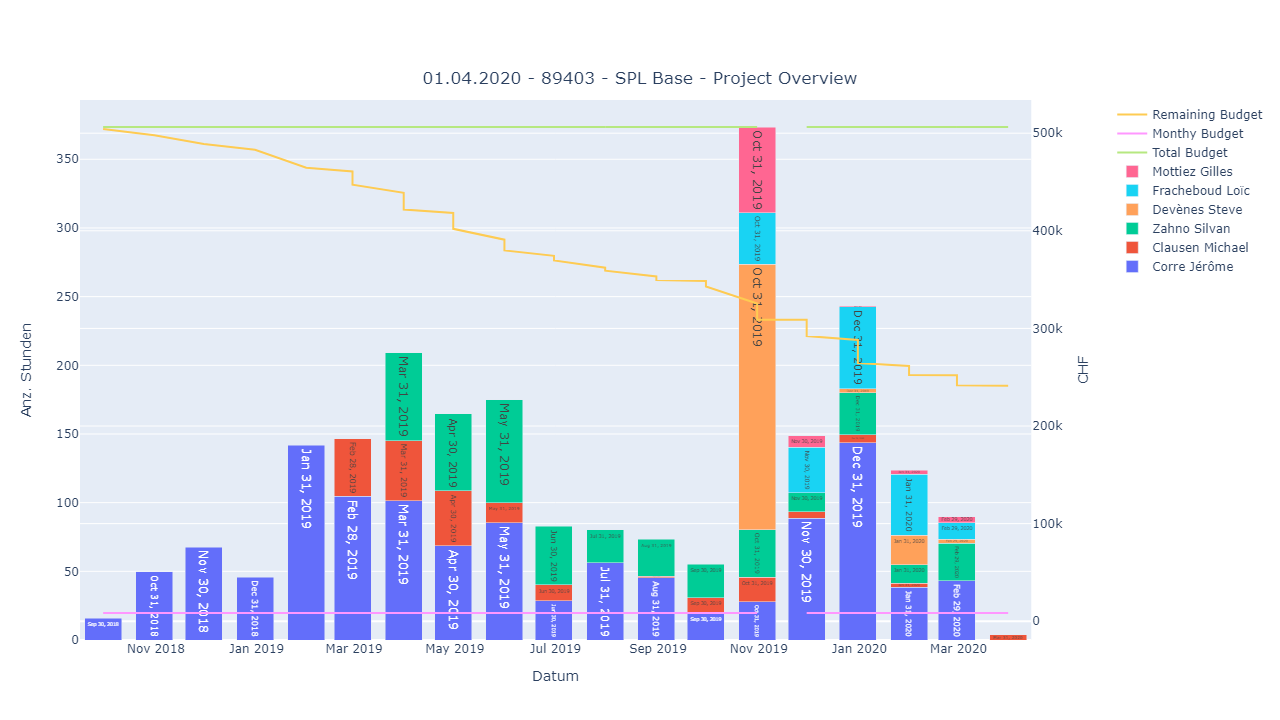

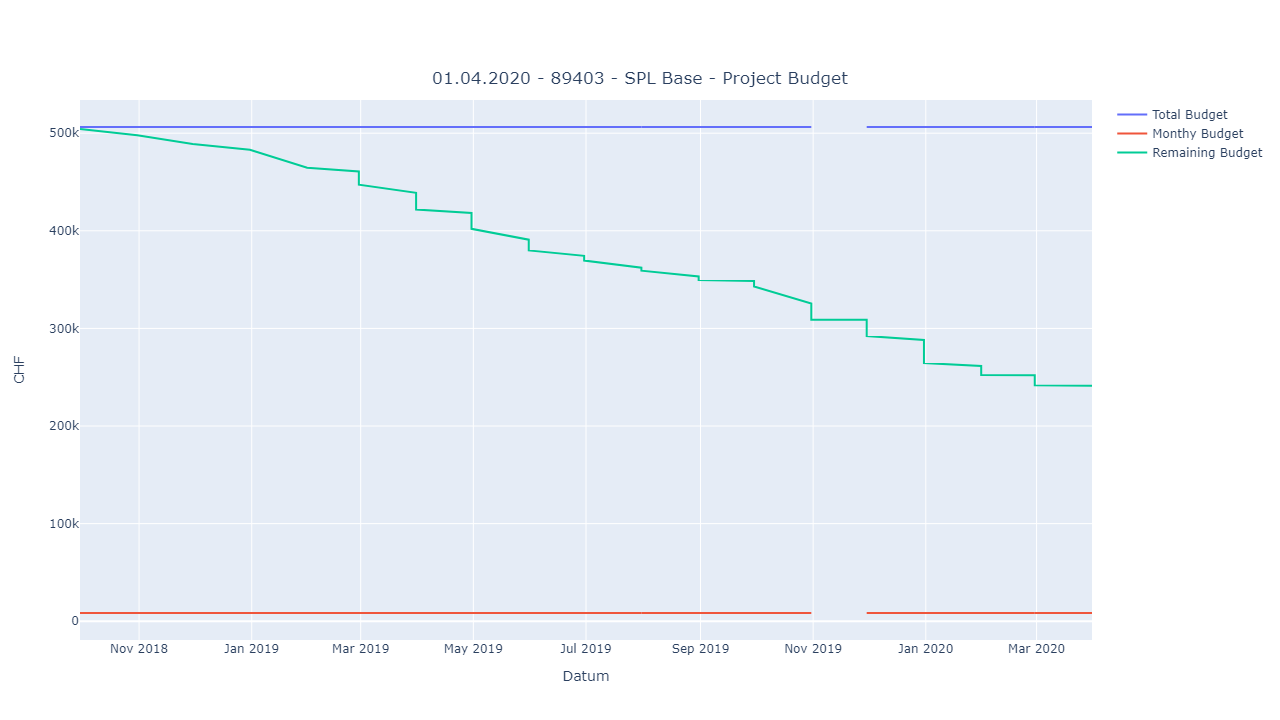

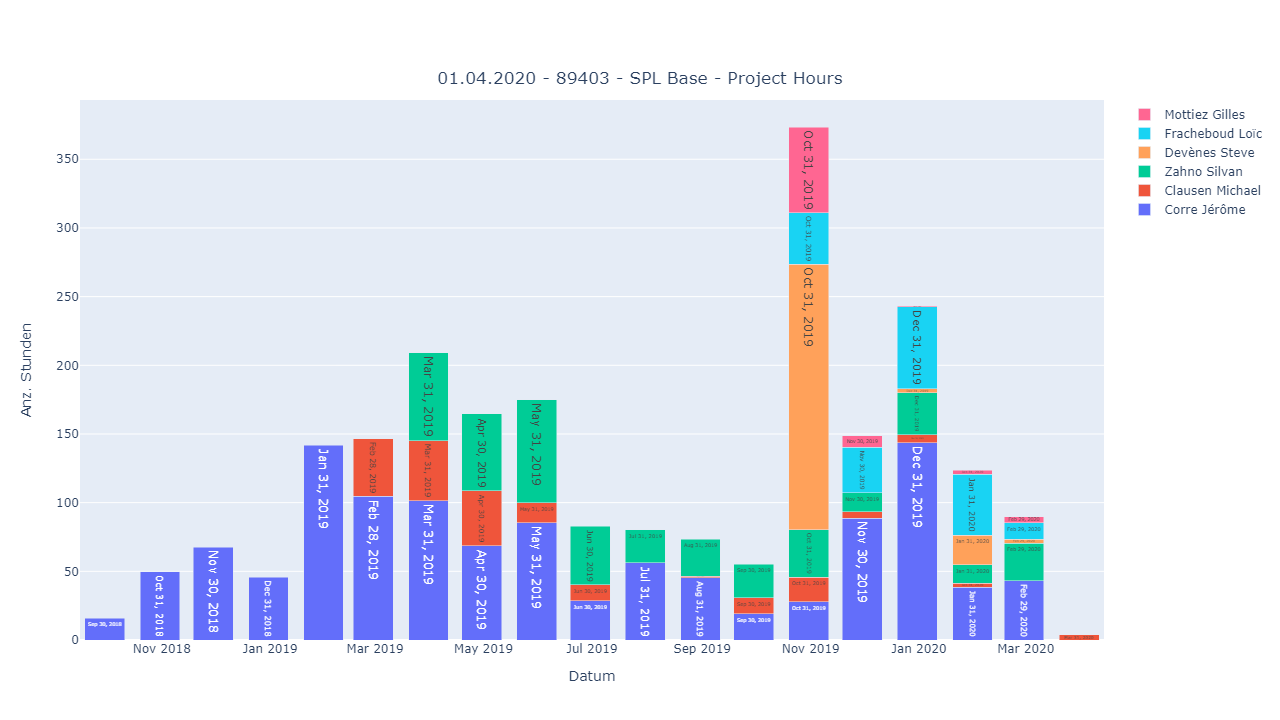

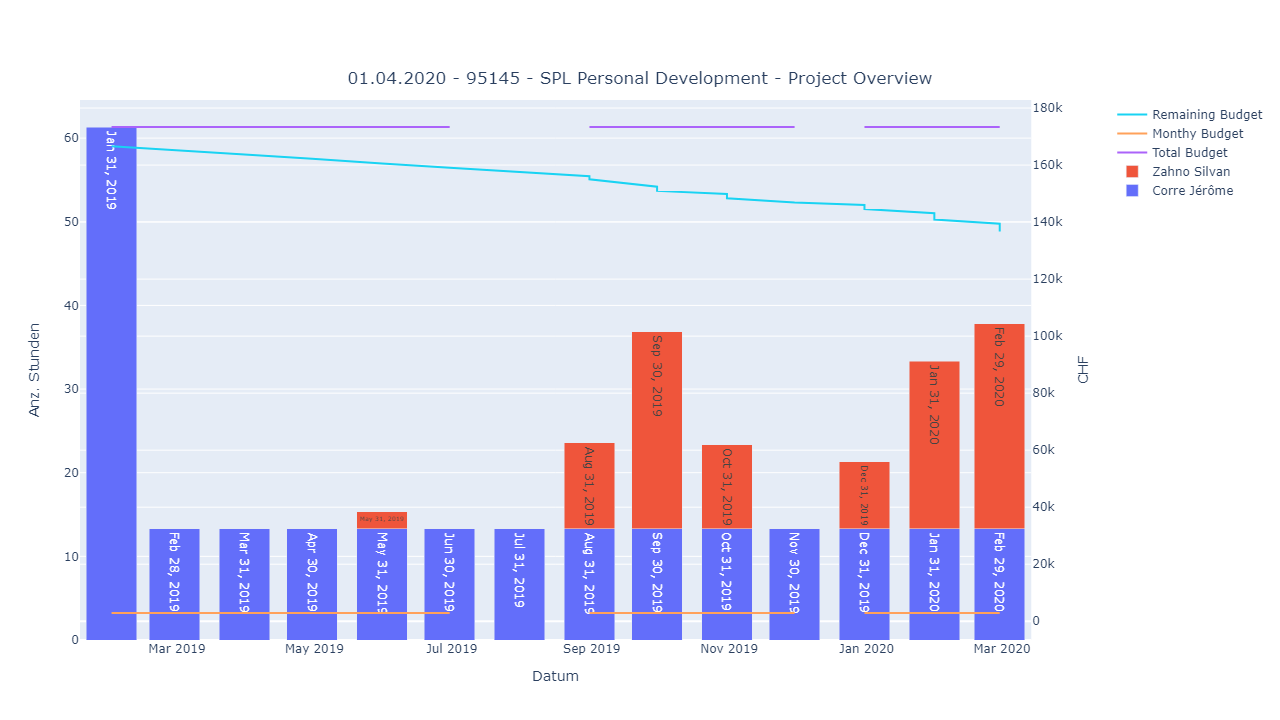

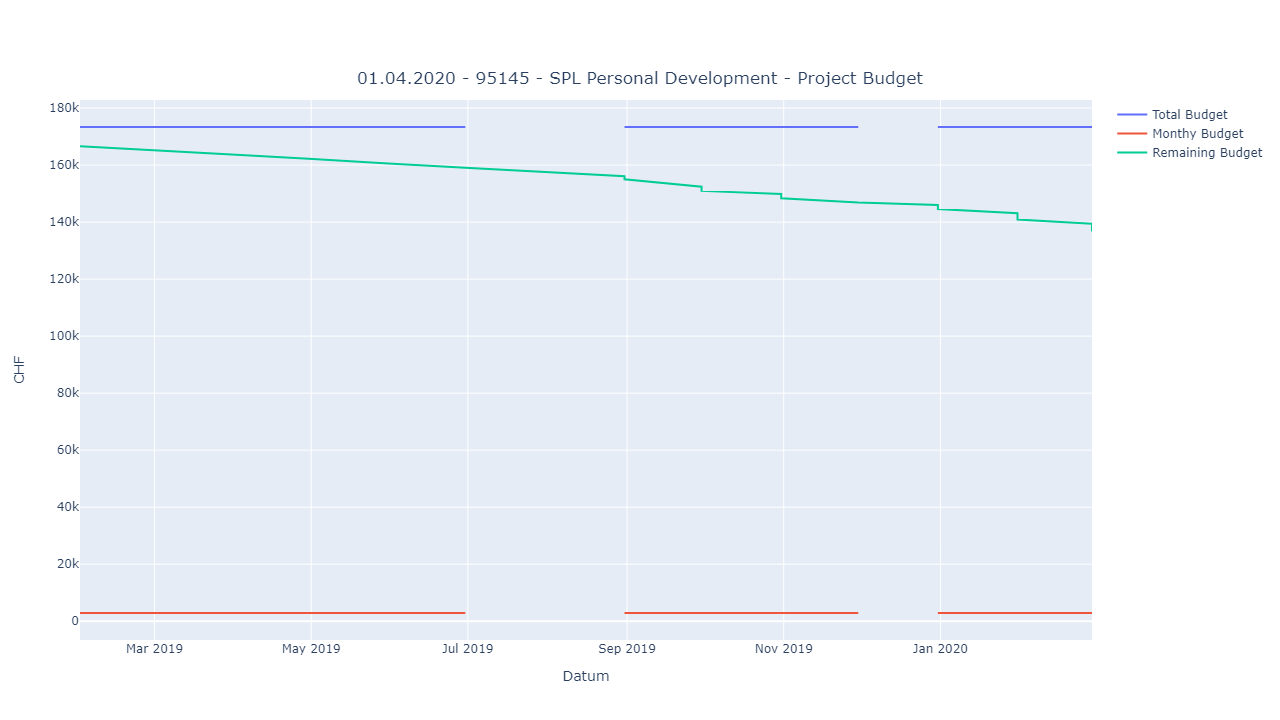

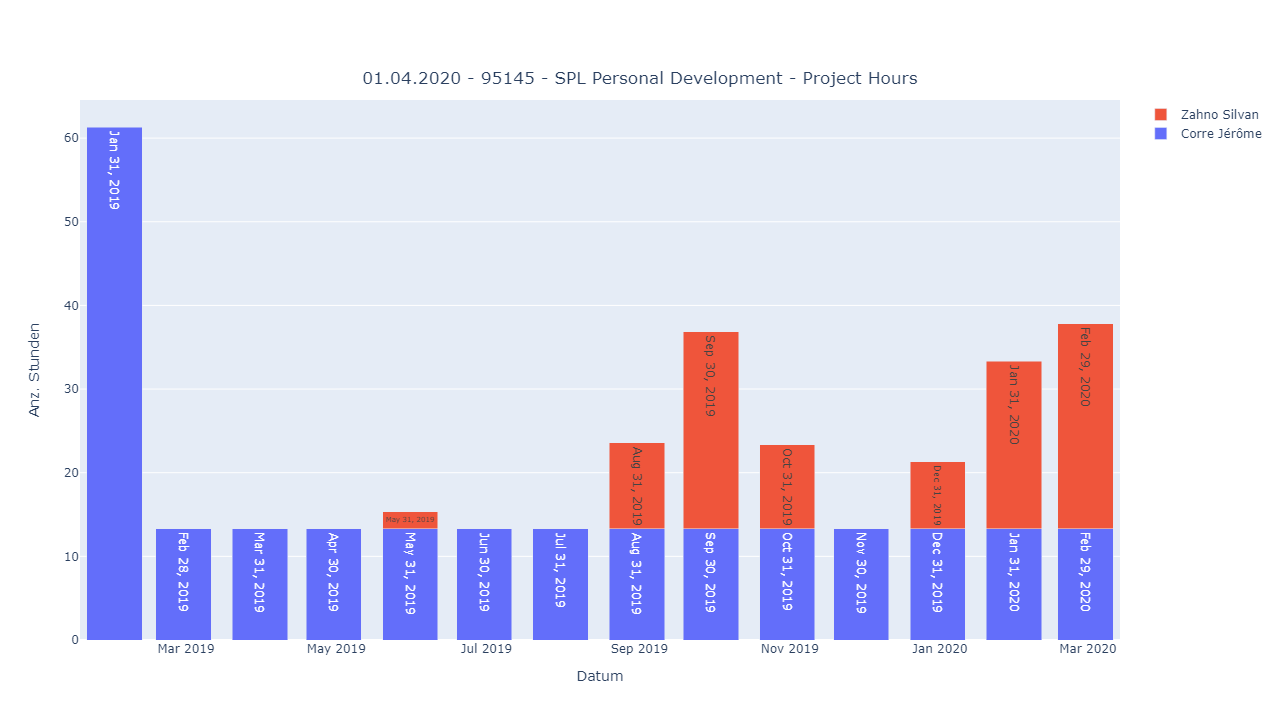

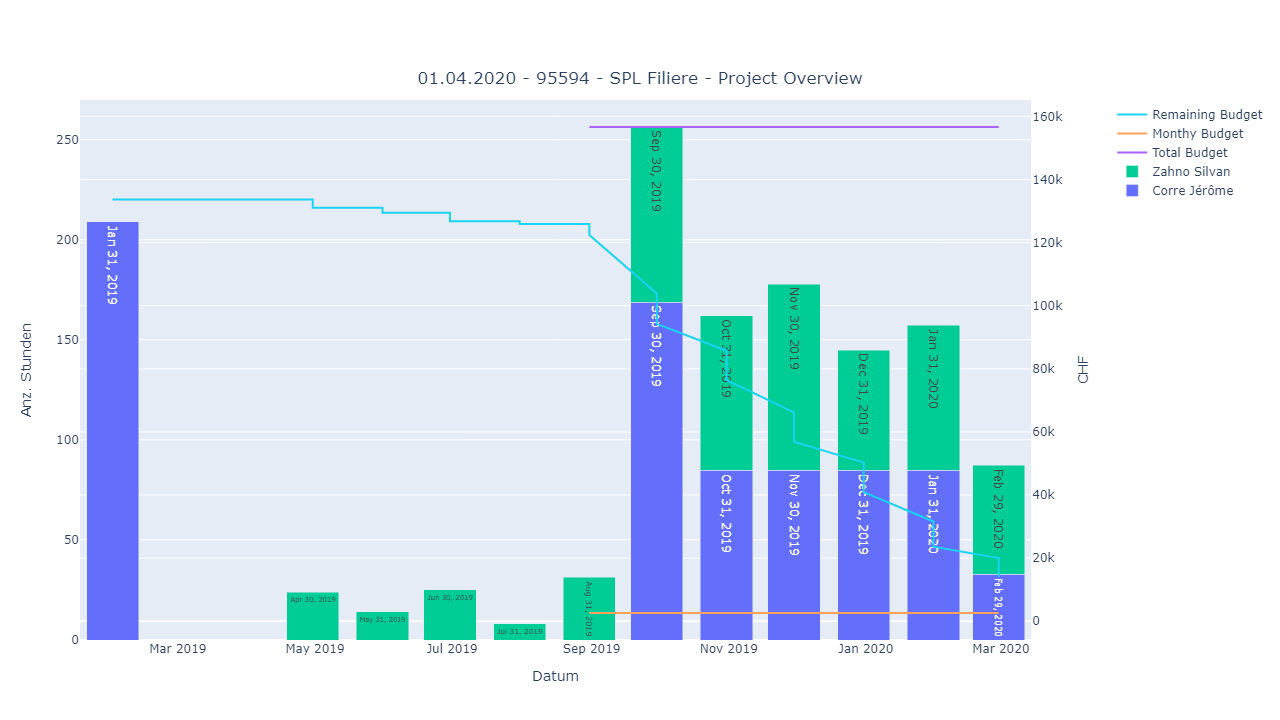

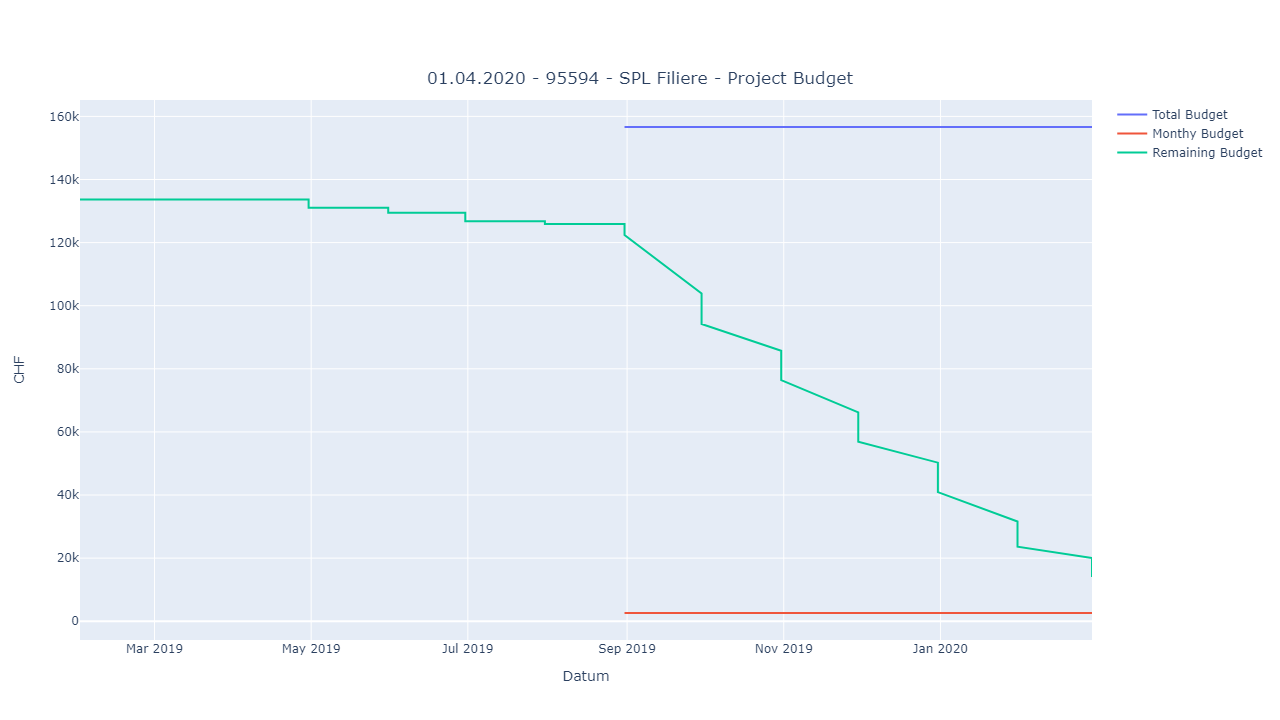

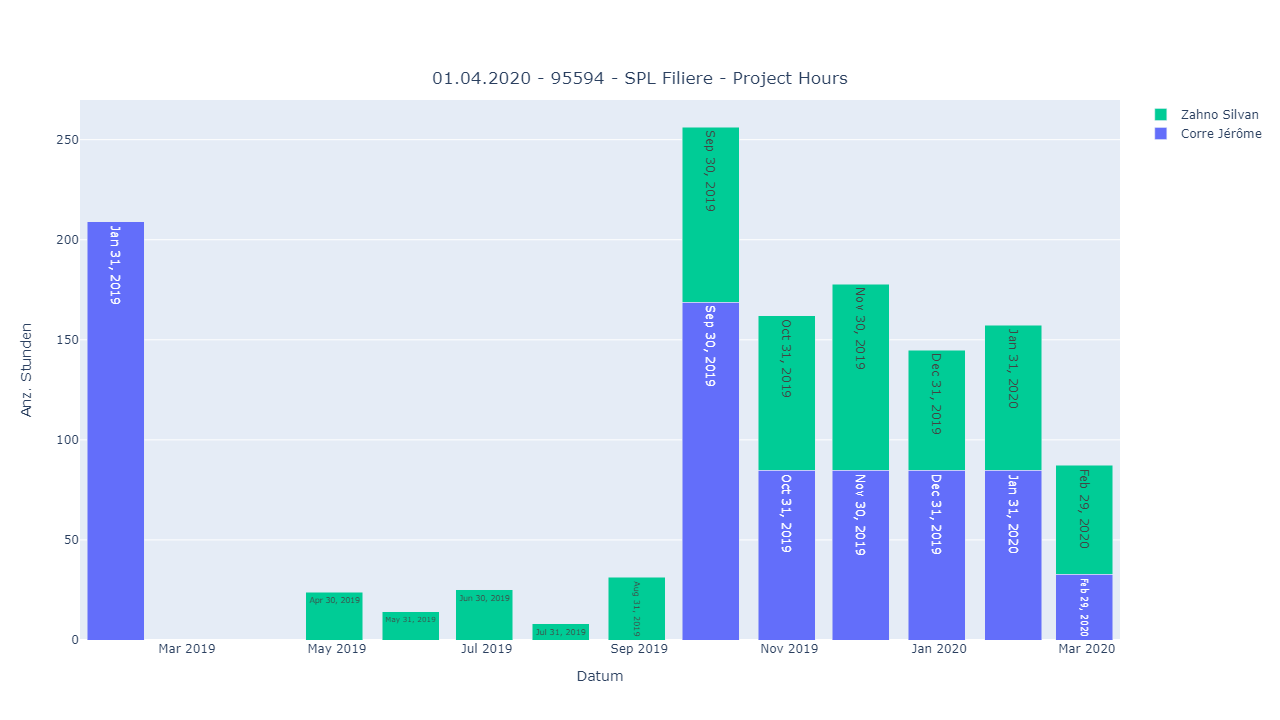

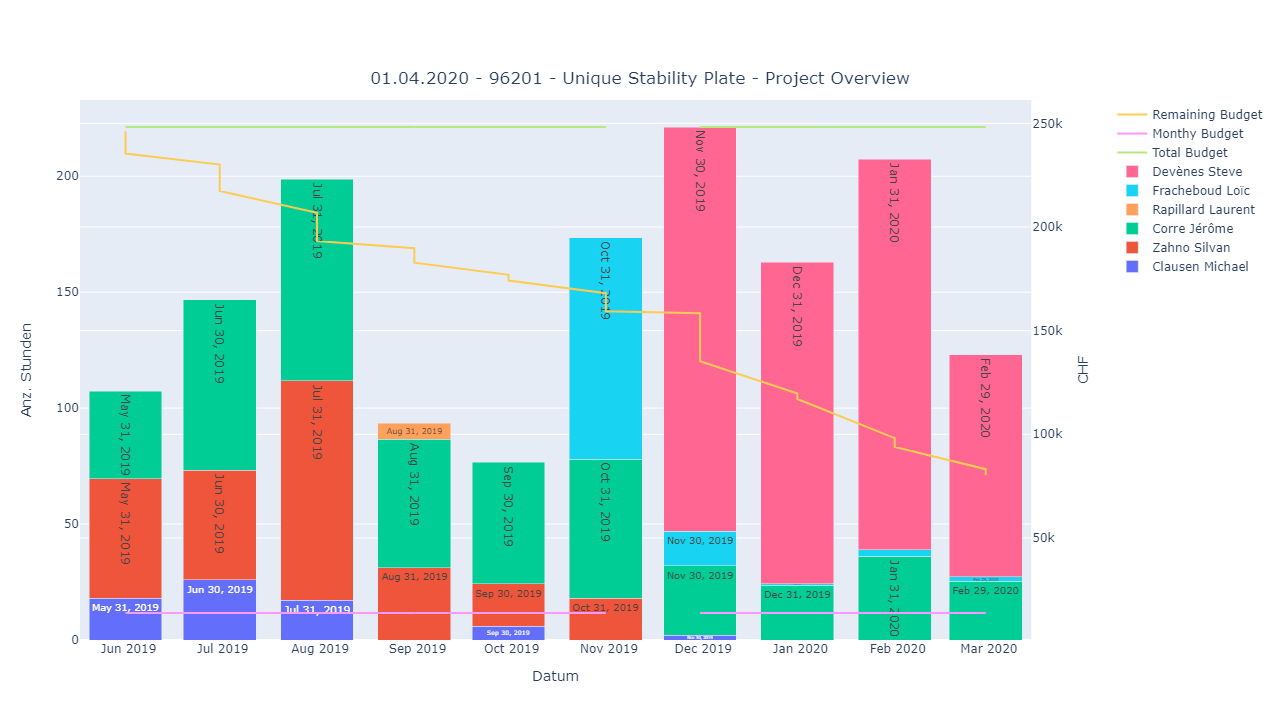

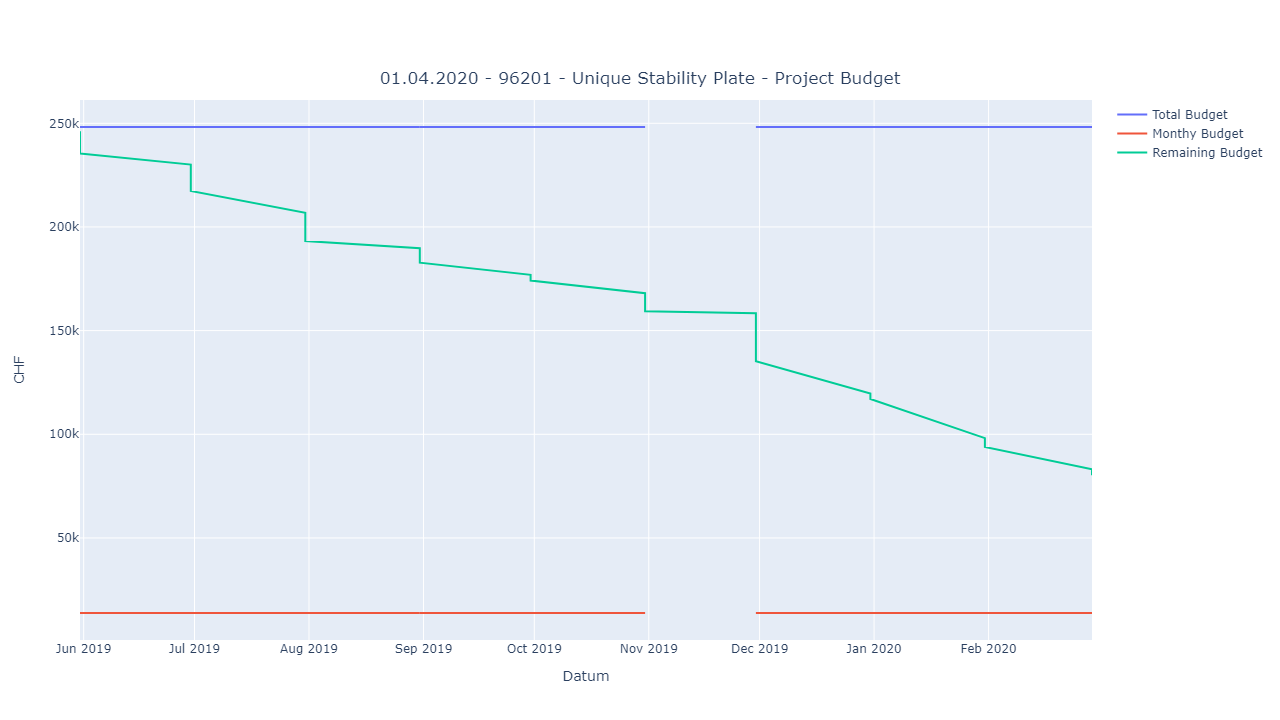

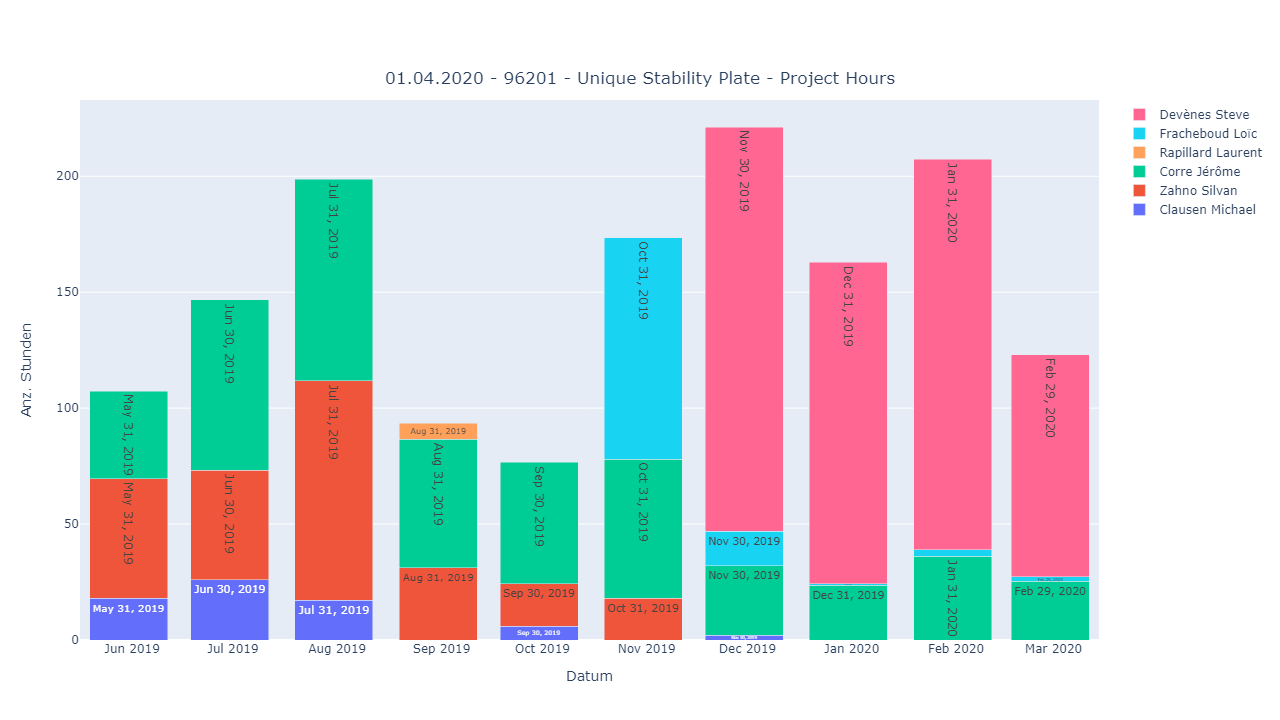

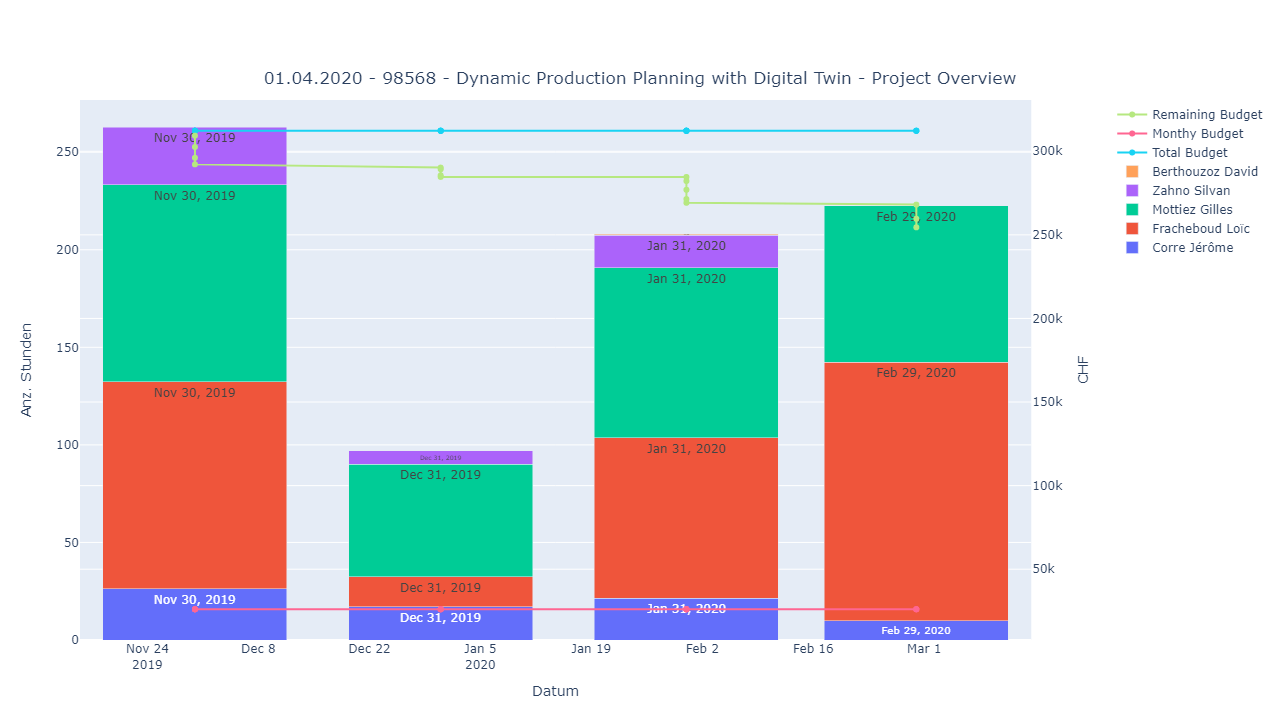

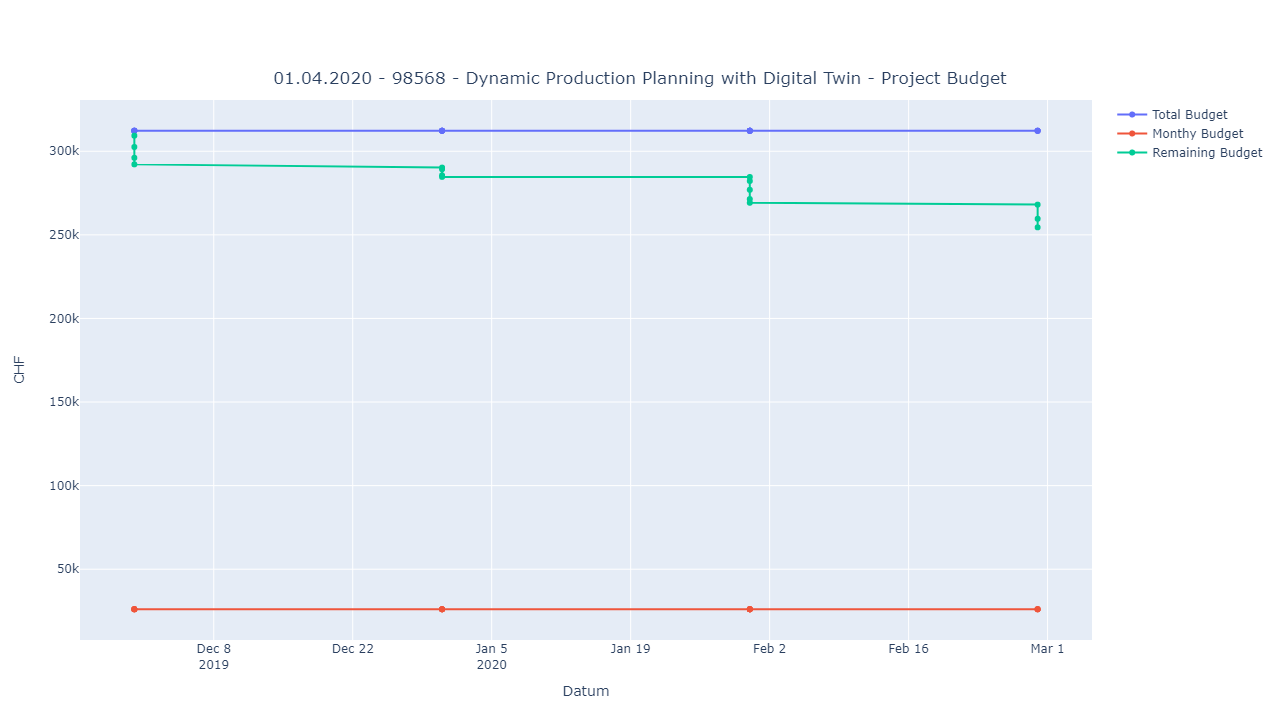

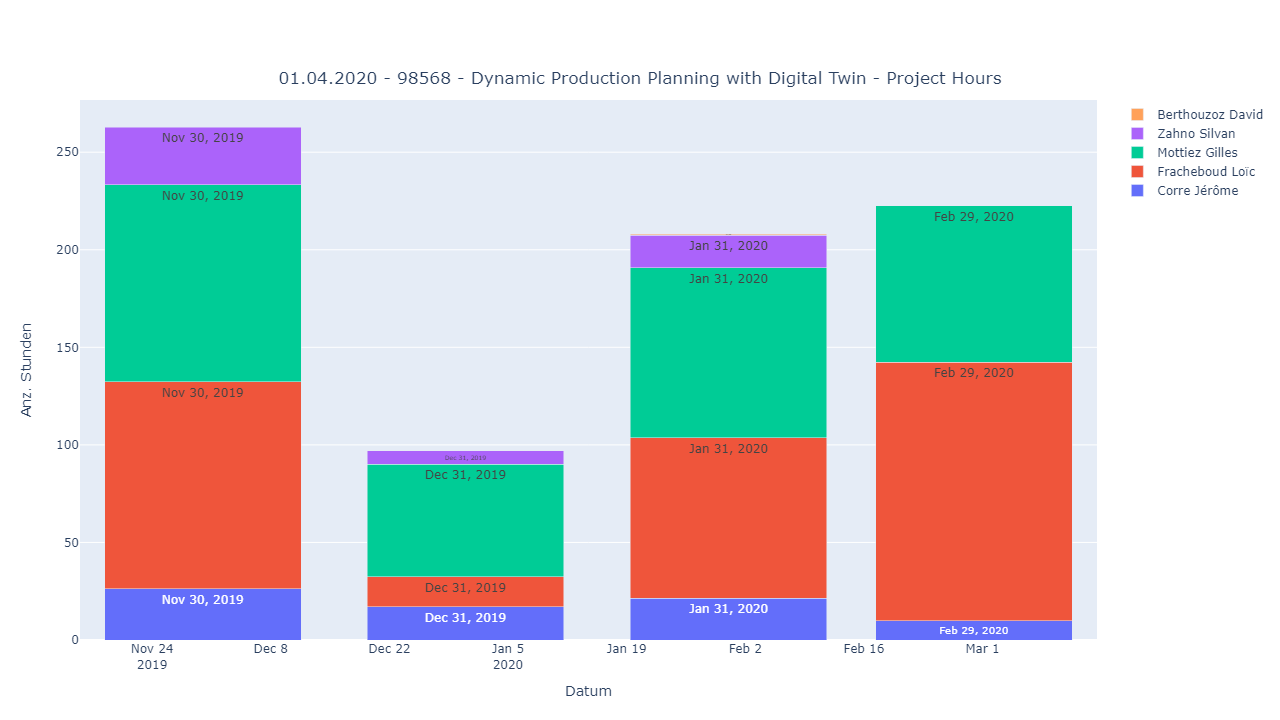

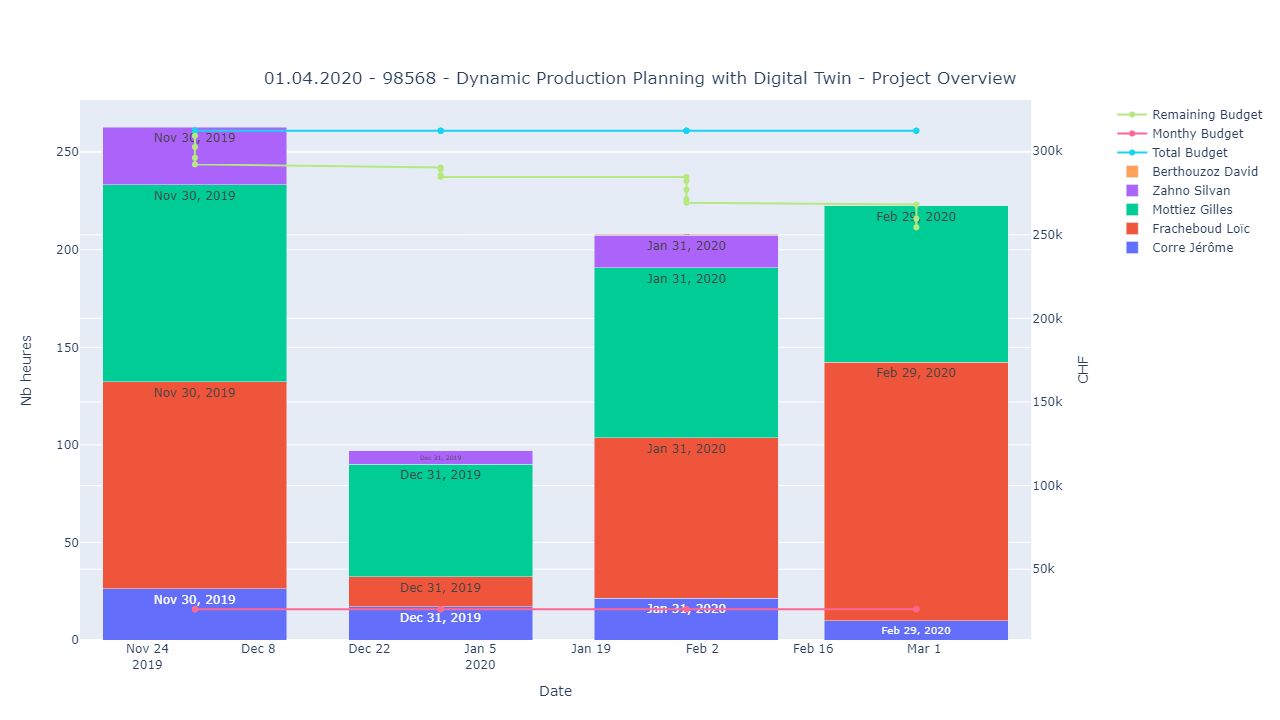

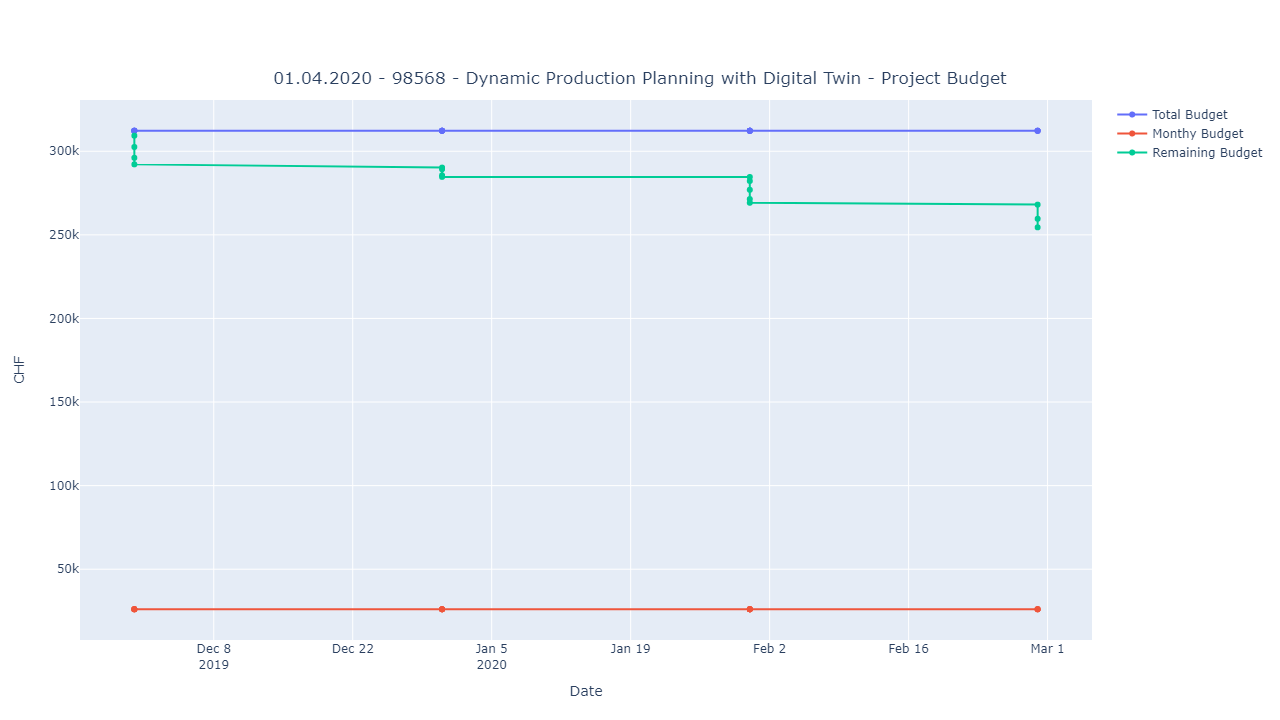

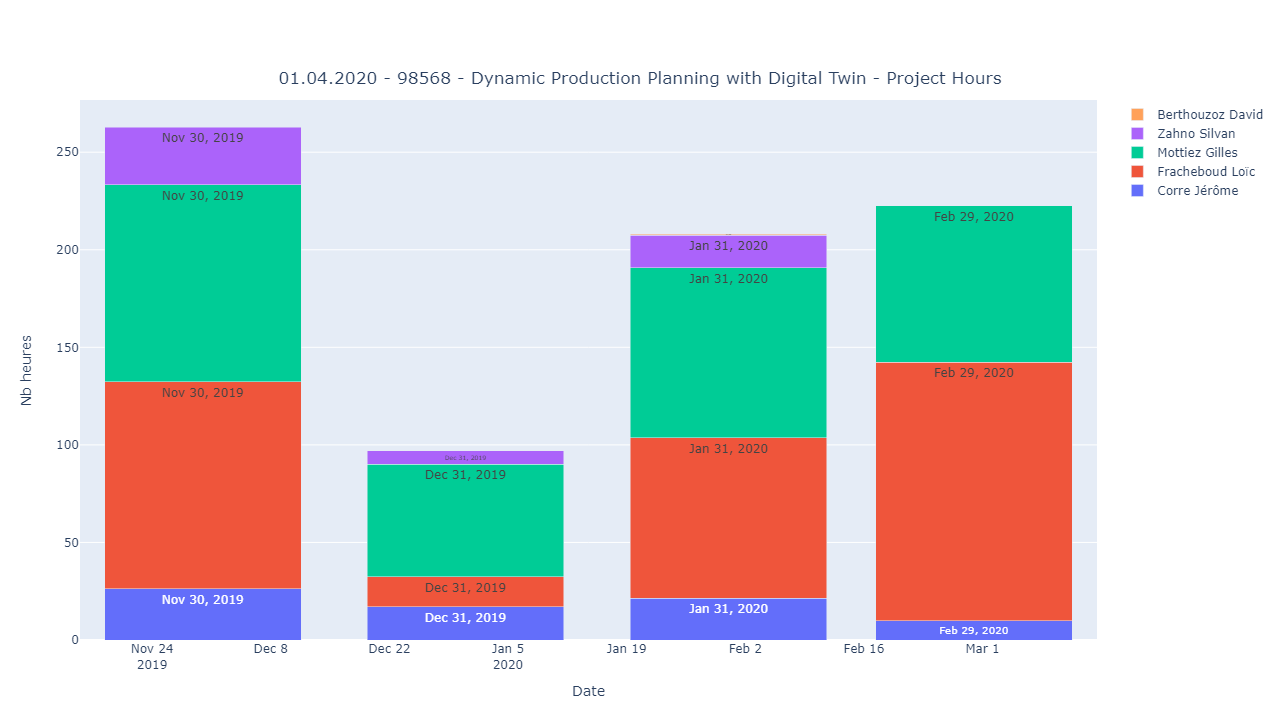

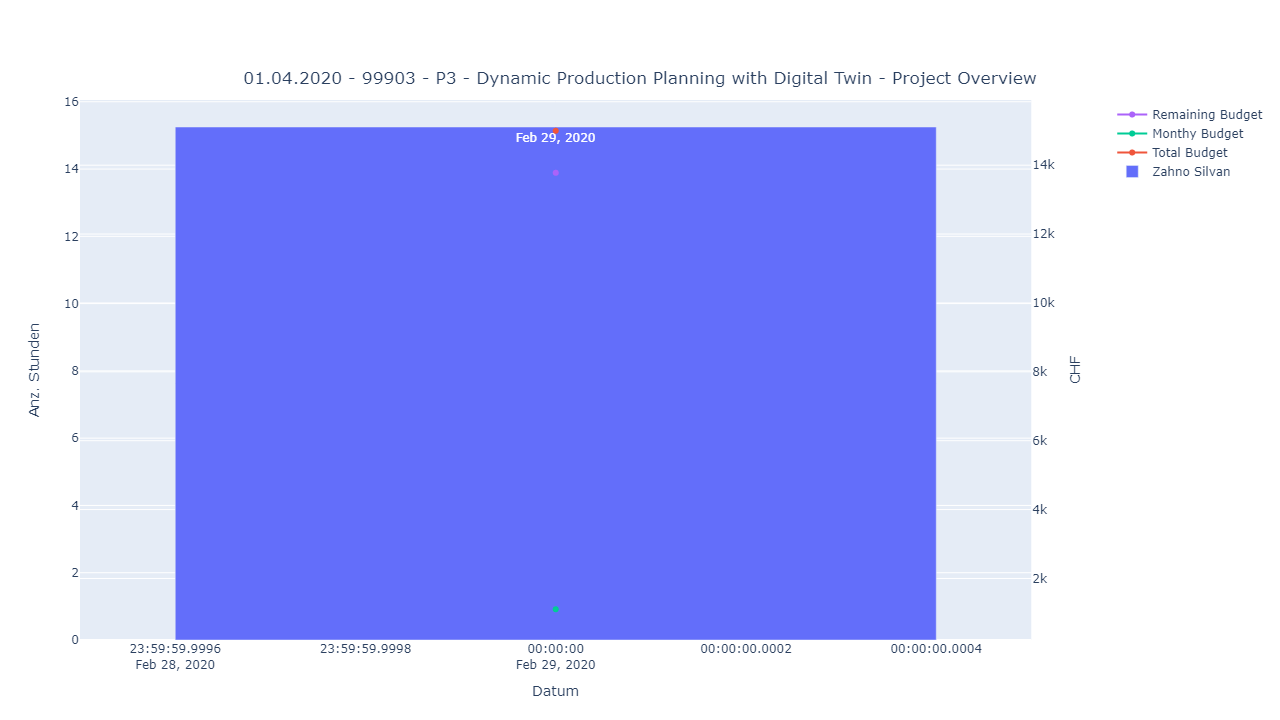

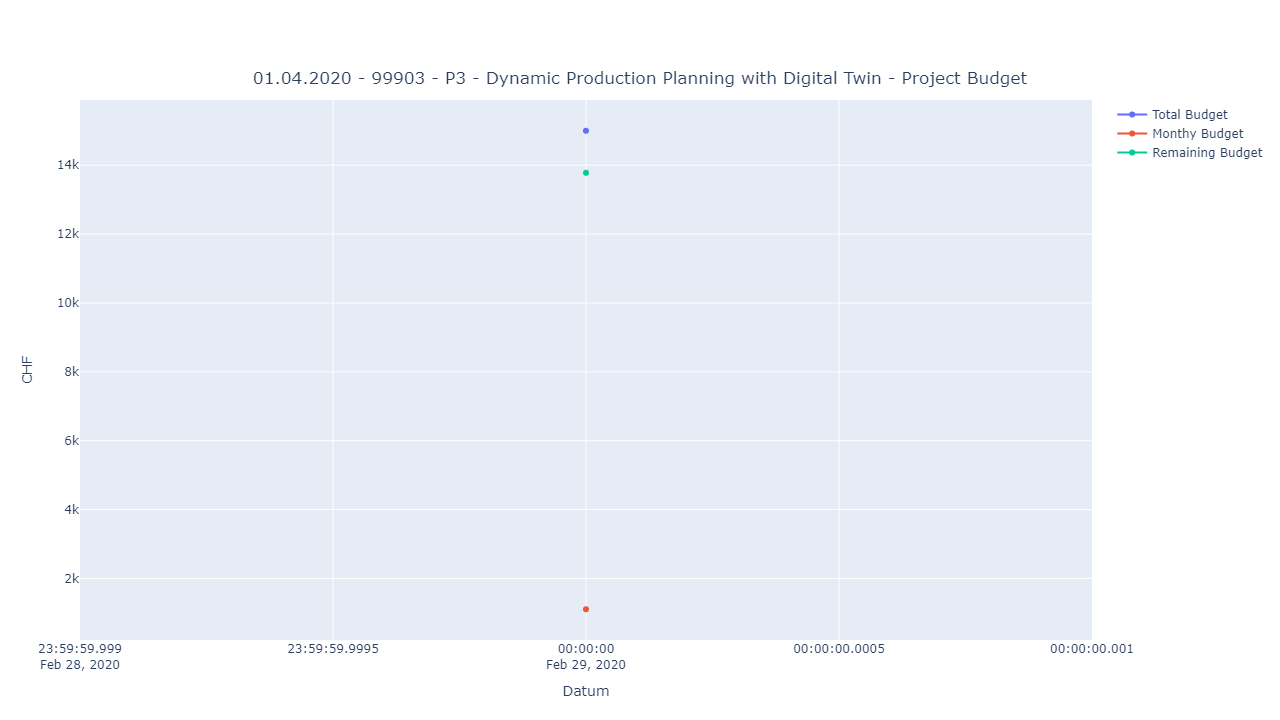

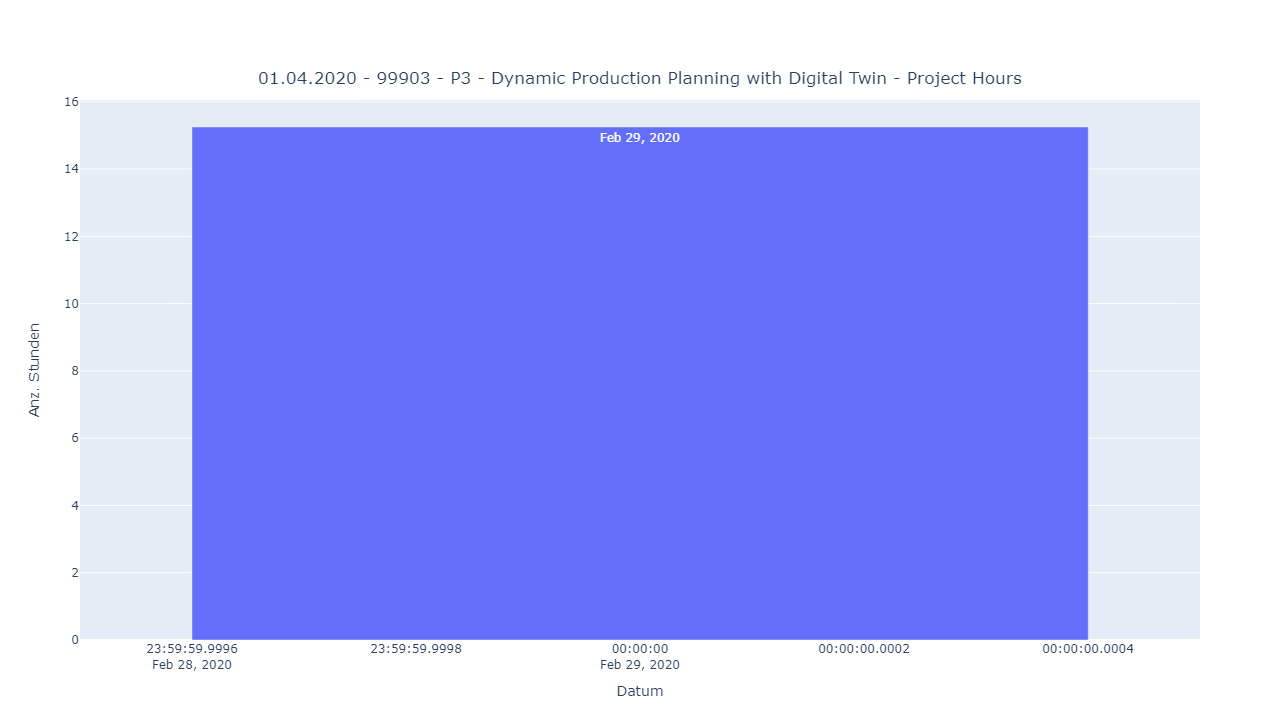

In [11]:
dfs = aggregated3Dfs
for i in range(len(projectConfs)):
  projectConf = projectConfs[i]
  df = dfs[i]
  ash_col = ashCols[projectConfs[i][1]]
  project_plot_combined(df, ash_col, projectDf, projectCol, projectConf, outputGraphDir, ext_file)
  project_plot_budget(df, ash_col, projectDf, projectCol, projectConf, outputGraphDir, ext_file)
  project_plot_hours(df, ash_col, projectDf, projectCol, projectConf, outputGraphDir, ext_file)  

## Cleanup

In [ ]:
remDir(outputMdDir, verbose)
remDir(outputGraphDir, verbose)